### 3.4.1 学習コードの実装

In [2]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_cbow.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [3]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [4]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any, Any}("say" => 2, "goodbye" => 3, "you" => 1, "hello" => 6, "." => 7, "and" => 4, "i" => 5), Dict{Any, Any}(5 => "i", 4 => "and", 6 => "hello", 7 => ".", 2 => "say", 3 => "goodbye", 1 => "you"))

In [5]:
vocab_size = length(word_to_id)
contexts, target = create_contexts_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32, 3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [6]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleCBOW(MatMul([[0.007410413133977582 0.004693952489639401 … 0.0017416924288585138 0.011342338754072746; 0.012524495275251351 -0.009588272484507644 … 0.022108354852729623 0.0033484790820293158; … ; -0.002174090430468124 -0.003118353970843089 … 0.020349987869246335 0.012915044219696983; 0.003684285977800256 -0.0038620431168507026 … -0.005788078829677428 0.00518521387468537]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.007410413133977582 0.004693952489639401 … 0.0017416924288585138 0.011342338754072746; 0.012524495275251351 -0.009588272484507644 … 0.022108354852729623 0.0033484790820293158; … ; -0.002174090430468124 -0.003118353970843089 … 0.020349987869246335 0.012915044219696983; 0.003684285977800256 -0.0038620431168507026 … -0.005788078829677428 0.00518521387468537]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[-0.012789518231781712 -0.009788439043971496 … 

In [7]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 5.84
| epoch 0 | iter 2 / 2 | loss 5.84
| epoch 10 | iter 2 / 2 | loss 5.84
| epoch 20 | iter 1 / 2 | loss 5.83
| epoch 20 | iter 2 / 2 | loss 5.83
| epoch 30 | iter 2 / 2 | loss 5.81
| epoch 40 | iter 1 / 2 | loss 5.79
| epoch 40 | iter 2 / 2 | loss 5.76
| epoch 50 | iter 2 / 2 | loss 5.75
| epoch 60 | iter 1 / 2 | loss 5.7
| epoch 60 | iter 2 / 2 | loss 5.65
| epoch 70 | iter 2 / 2 | loss 5.63
| epoch 80 | iter 1 / 2 | loss 5.55
| epoch 80 | iter 2 / 2 | loss 5.48
| epoch 90 | iter 2 / 2 | loss 5.46
| epoch 100 | iter 1 / 2 | loss 5.34
| epoch 100 | iter 2 / 2 | loss 5.37
| epoch 110 | iter 2 / 2 | loss 5.25
| epoch 120 | iter 1 / 2 | loss 5.14
| epoch 120 | iter 2 / 2 | loss 5.13
| epoch 130 | iter 2 / 2 | loss 5.03
| epoch 140 | iter 1 / 2 | loss 4.85
| epoch 140 | iter 2 / 2 | loss 4.73
| epoch 150 | iter 2 / 2 | loss 4.77
| epoch 160 | iter 1 / 2 | loss 4.57
| epoch 160 | iter 2 / 2 | loss 4.38
| epoch 170 | iter 2 / 2 | loss 4.36
| epoch 180 | iter 

| epoch 570 | iter 2 / 2 | loss 1.65


| epoch 580 | iter 1 / 2 | loss 1.4
| epoch 580 | iter 2 / 2 | loss 3.15
| epoch 590 | iter 2 / 2 | loss 1.16
| epoch 600 | iter 1 / 2 | loss 1.43
| epoch 600 | iter 2 / 2 | loss 1.92
| epoch 610 | iter 2 / 2 | loss 1.56
| epoch 620 | iter 1 / 2 | loss 1.31
| epoch 620 | iter 2 / 2 | loss 3.01
| epoch 630 | iter 2 / 2 | loss 1.24
| epoch 640 | iter 1 / 2 | loss 1.61
| epoch 640 | iter 2 / 2 | loss 1.88
| epoch 650 | iter 2 / 2 | loss 1.18
| epoch 660 | iter 1 / 2 | loss 1.21
| epoch 660 | iter 2 / 2 | loss 0.91
| epoch 670 | iter 2 / 2 | loss 1.25
| epoch 680 | iter 1 / 2 | loss 0.95
| epoch 680 | iter 2 / 2 | loss 0.65
| epoch 690 | iter 2 / 2 | loss 0.97
| epoch 700 | iter 1 / 2 | loss 1.28
| epoch 700 | iter 2 / 2 | loss 0.61
| epoch 710 | iter 2 / 2 | loss 0.81
| epoch 720 | iter 1 / 2 | loss 1.15
| epoch 720 | iter 2 / 2 | loss 0.48
| epoch 730 | iter 2 / 2 | loss 1.04
| epoch 740 | iter 1 / 2 | loss 1.05
| epoch 740 | iter 2 / 2 | loss 0.21
| epoch 750 | iter 2 / 2 | loss 0.7
| e

In [8]:
using Plots
gr()

Plots.GRBackend()

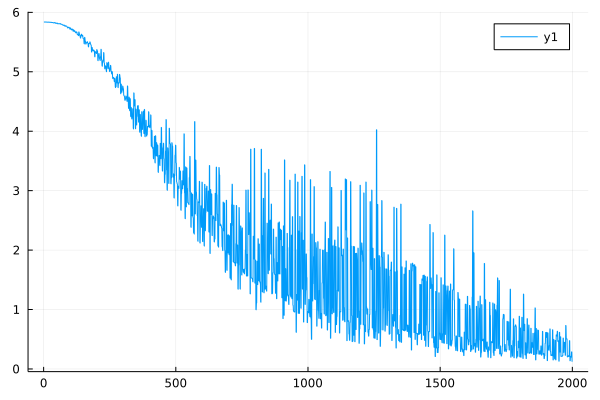

In [9]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [10]:
for (word_id, word) = id_to_word
    @show word model.word_vecs[word_id, :]
end

word = "i"
model.word_vecs[word_id, :] = 

[-0.0010860591510325512, -0.02014370464194275, -0.011354401084969235, -0.0014139632034597435, 0.0009735612850930877]
word = "and"
model.word_vecs[word_id, :] = [-0.008100268402662683, -0.004837405113834025, -0.0006632885137505256, -0.010960435556096364, -0.01782219187993199]
word = "hello"
model.word_vecs[word_id, :] = [-0.002174090430468124, -0.003118353970843089, 0.005853650739546472, 0.020349987869246335, 0.012915044219696983]
word = "."
model.word_vecs[word_id, :] = [0.003684285977800256, -0.0038620431168507026, 0.002492543547007566, -0.005788078829677428, 0.00518521387468537]
word = "say"
model.word_vecs[word_id, :] = [0.012524495275251351, -0.009588272484507644, -0.002924417867665431, 0.022108354852729623, 0.0033484790820293158]
word = "goodbye"
model.word_vecs[word_id, :] = [-0.009019686000606488, 0.008676936318514487, 0.004641262762623756, -0.001559083684634467, -0.015105333123511365]
word = "you"
model.word_vecs[word_id, :] = [0.007410413133977582, 0.004693952489639401, 0.0002